In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

In [2]:
df = pd.read_csv('ECA_blended_custom/TG_STAID002759.csv')
df.columns = ["ID", "RAW_DATE", "RAW_TEMP", "QUALITY"]

In [3]:
df["TEMP_NEW"] = df["RAW_TEMP"] / 10

In [4]:
s = df["RAW_DATE"].astype(str)
year = s.str[0:4]
month = s.str[4:6]
day = s.str[6:8]
df["ISODATE"] = pd.to_datetime(year + "-" + month + "-" + day)
df.head(10)

,ID,RAW_DATE,RAW_TEMP,QUALITY,TEMP_NEW,ISODATE
0,127488,18760101,22,0,2.2,1876-01-01
1,127488,18760102,25,0,2.5,1876-01-02
2,127488,18760103,3,0,0.3,1876-01-03
3,127488,18760104,-58,0,-5.8,1876-01-04
4,127488,18760105,-98,0,-9.8,1876-01-05
5,127488,18760106,-77,0,-7.7,1876-01-06
6,127488,18760107,-66,0,-6.6,1876-01-07
7,127488,18760108,-89,0,-8.9,1876-01-08
8,127488,18760109,-127,0,-12.7,1876-01-09
9,127488,18760110,-89,0,-8.9,1876-01-10


In [13]:
df2 = df.set_index("ISODATE")

<Axes: xlabel='ISODATE'>

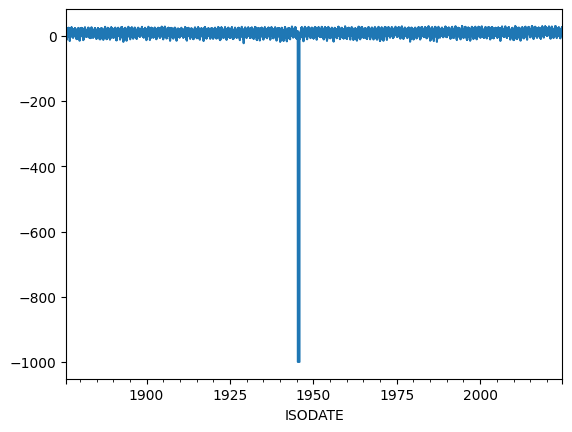

In [6]:
df2["TEMP_NEW"].plot()

In [14]:

df2.loc["1945-04-25":"1945-11-05"] = df2.loc["1944-04-25":"1944-11-05"].values

In [15]:
df2.loc["1945-04-25":"1945-11-05"]

,ID,RAW_DATE,RAW_TEMP,QUALITY,TEMP_NEW
ISODATE,,,,,
1945-04-25,127488,19440425,92,0,9.2
1945-04-26,127488,19440426,92,0,9.2
1945-04-27,127488,19440427,88,0,8.8
1945-04-28,127488,19440428,86,0,8.6
1945-04-29,127488,19440429,68,0,6.8
...,...,...,...,...,...
1945-11-01,127488,19441101,60,0,6.0
1945-11-02,127488,19441102,54,0,5.4
1945-11-03,127488,19441103,55,0,5.5


<Axes: xlabel='ISODATE'>

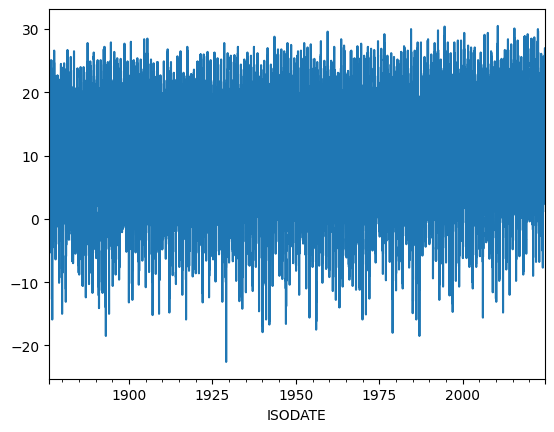

In [16]:
df2["TEMP_NEW"].plot()

In [55]:
df3 = df2.resample("2Y")["TEMP_NEW"].mean().reset_index()
df3.head(10)

/var/folders/zc/ws3vn9916p5gllcmcl_n6bf00000gn/T/ipykernel_61616/271836808.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df3 = df2.resample("2Y")["TEMP_NEW"].mean().reset_index()


,ISODATE,TEMP_NEW
0,1876-12-31,9.320219
1,1878-12-31,9.982329
2,1880-12-31,8.993981
3,1882-12-31,9.085890
4,1884-12-31,8.573461
5,1886-12-31,8.046849
6,1888-12-31,8.375103
7,1890-12-31,9.158082
8,1892-12-31,8.935978
9,1894-12-31,9.210274


/var/folders/zc/ws3vn9916p5gllcmcl_n6bf00000gn/T/ipykernel_61616/554103043.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


<Axes: >

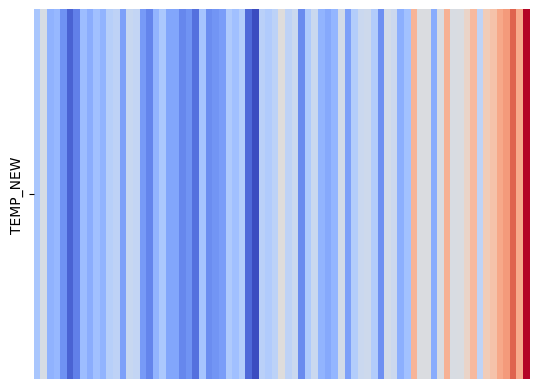

In [56]:
cmap = cm.get_cmap('coolwarm')
sns.heatmap(df3[["TEMP_NEW"]].transpose(), cbar=False, xticklabels=[], cmap=cmap)